<a href="https://colab.research.google.com/github/yvsim001/projekt/blob/main/MeinMNIST_NETZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install pandas==2.0.0
!pip install tensorflow==2.12
!pip install scikit-learn==1.2.2
!pip install matplotlib==3.7.1
!pip install keras==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.13 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albumentations 1.4.13 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into 

In [ ]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers

print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


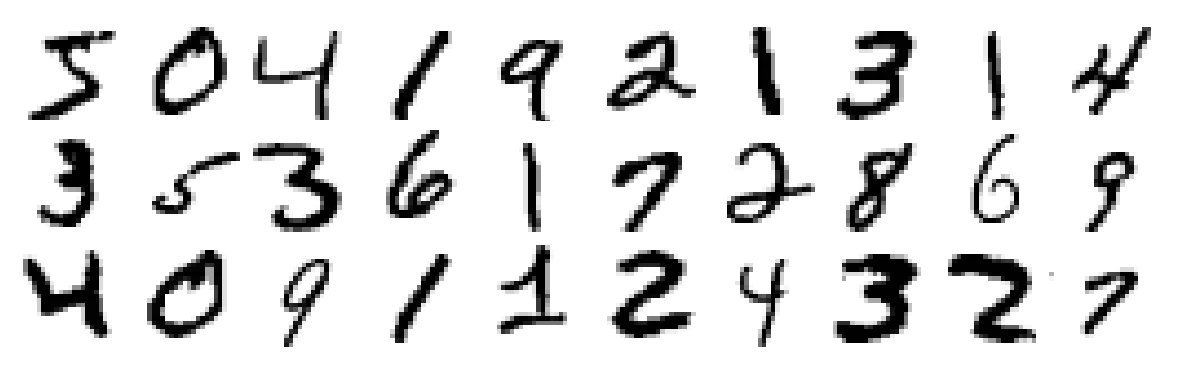

In [ ]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1
        )


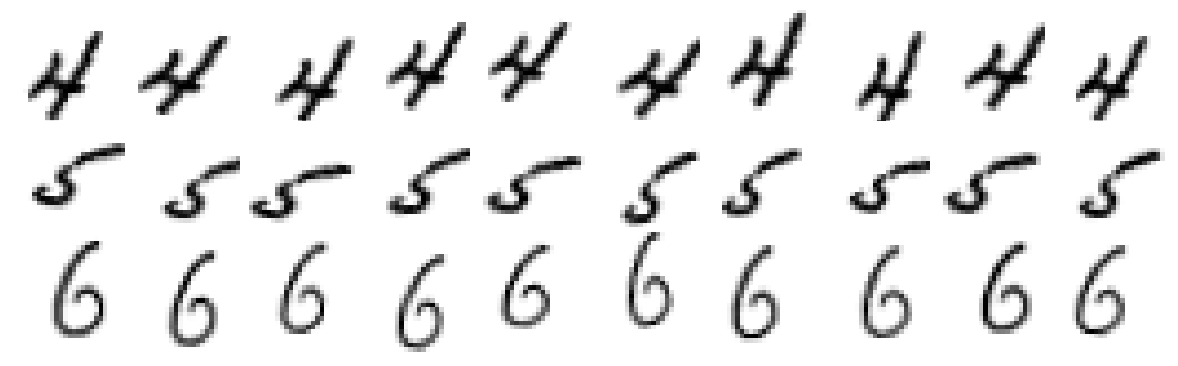

In [ ]:
# PREVIEW AUGMENTED IMAGES
X_train3 = x_train[9].reshape((1, 28, 28, 1))
Y_train3 = y_train[9].reshape((1, 10))
plt.figure(figsize=(15, 4.5))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    X_train2, Y_train2 = next(datagen.flow(X_train3, Y_train3))
    plt.imshow(X_train2[0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
    if i == 9: X_train3 = x_train[11].reshape((1, 28, 28, 1))
    if i == 19: X_train3 = x_train[18].reshape((1, 28, 28, 1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=3),
    layers.ReLU(),
    layers.Conv2D(32, kernel_size=3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=3),
    layers.ReLU(),
    layers.Conv2D(64, kernel_size=3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=3),
    layers.ReLU(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])





In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0]
epochs = 30

X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.1)


In [ ]:
# Ensure shapes are correct
print(X_train2.shape)  # Should be (54000, 28, 28, 1)
print(Y_train2.shape)  # Should be (54000, 10)
print(X_val2.shape)  # Should be (6000, 28, 28, 1)
print(Y_val2.shape)  # Should be (6000, 10)

(54000, 28, 28, 1)
(54000, 10)
(6000, 28, 28, 1)
(6000, 10)


In [ ]:
train_dataset= datagen.flow(
    X_train2,
    Y_train2,
    batch_size=64)

validation_dataset= datagen.flow(
    X_val2,
    Y_val2,
    batch_size=64)

for batch in train_dataset:
  print(batch[0].shape)
  break

for batch in validation_dataset:
  print(batch[0].shape)
  break

(64, 28, 28, 1)
(64, 28, 28, 1)


In [ ]:
early_stopping = EarlyStopping(patience=10)

In [ ]:
history = model.fit(
    train_dataset,
    epochs = epochs,
    validation_data = validation_dataset,
    callbacks=[annealer,early_stopping],
    verbose=1)

Epoch 1/30
844/844 [==============================] - 166s 193ms/step - loss: 0.2926 - accuracy: 0.9059 - val_loss: 0.1438 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 2/30
844/844 [==============================] - 154s 182ms/step - loss: 0.0851 - accuracy: 0.9735 - val_loss: 0.0596 - val_accuracy: 0.9800 - lr: 9.5000e-04
Epoch 3/30
844/844 [==============================] - 155s 184ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0523 - val_accuracy: 0.9835 - lr: 9.0250e-04
Epoch 4/30
844/844 [==============================] - 155s 184ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0464 - val_accuracy: 0.9847 - lr: 8.5737e-04
Epoch 5/30
844/844 [==============================] - 157s 187ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0415 - val_accuracy: 0.9875 - lr: 8.1451e-04
Epoch 6/30
844/844 [==============================] - 155s 183ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0447 - val_accuracy: 0.9878 - lr: 7.7378e-04
Epoch 7/30
844/844 [======

In [ ]:
 # Print training and validation accuracy
print("CNN: Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(
    epochs, max(history.history['accuracy']), max(history.history['val_accuracy'])
))

CNN: Epochs=30, Train accuracy=0.99761, Validation accuracy=0.99367


In [ ]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 re_lu_1 (ReLU)              (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['loss'],
                    mode='lines+markers',
                    name='Training loss'))
fig.add_trace(go.Scatter(y = history.history['val_loss'],
                    mode='lines+markers',
                    name='Validation loss'))

fig.update_layout(title_text = 'Loss of model')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['accuracy'],
                    mode='lines+markers',
                    name='Training accuracy'))
fig.add_trace(go.Scatter(y = history.history['val_accuracy'],
                    mode='lines+markers',
                    name='Validation accuracy'))

fig.update_layout(title_text = 'Accuracy of model')
fig.show()

In [ ]:
classes = {"0","1","2","3","4","5","6","7","8","9"}
test_dataset= datagen.flow(
    x_test,
    y_test,
    batch_size=64)

for batch in test_dataset:
  print(batch[0].shape)
  break

(64, 28, 28, 1)


In [ ]:
test_generator=test_dataset
predict = model.predict(test_generator, steps=int(np.ceil(x_test.shape[0] / 64)))

157/157 [==============================] - 9s 54ms/step


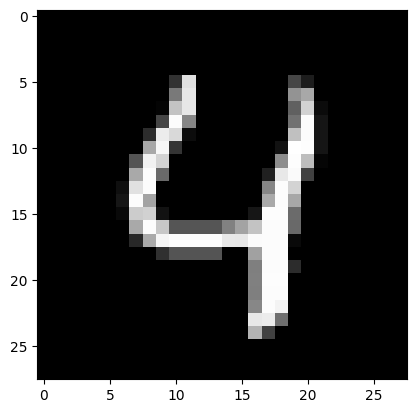

1/1 [==============================] - 0s 110ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 100.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%


In [ ]:
import matplotlib.pyplot as plt
test_images = x_test
# For example, if test_images[4] is a single image with shape (28, 28, 1)
img = test_images[4]

# Display the image
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")

In [ ]:
model.save('/content/drive/MyDrive/trained_models/meinMNIST.h5')
#model.save('/content/drive/MyDrive/trained_models/meinMNIST')
model.save('/content/drive/MyDrive/trained_models/meinMNIST.keras')
model.export('/content/drive/MyDrive/trained_models/meinMNIST')

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/save.py", line 714, in _trace_gradient_functions
    def_function.function(custom_gradient).get_concrete_function(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 1258, in get_concrete_function
    concrete = self._get_concrete_function_garbage_collected(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 1238, in _get_concrete_function_garbage_collected
    self._initialize(args, kwargs, add_initializers_to=initializers)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 763, in _initialize
    self._variable_creation_fn    # pylint: disable=protected-access
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic

ValueError: Error when tracing gradients for SavedModel.

Check the error log to see the error that was raised when converting a gradient function to a concrete function. You may need to update the custom gradient, or disable saving gradients with the option tf.saved_model.SaveOptions(experimental_custom_gradients=False).
	Problematic op name: IdentityN
	Gradient inputs: (<tf.Tensor 'gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 1, 32) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d/BiasAdd/BiasAddGrad:0' shape=(32,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_1/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 32, 32) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_1/BiasAdd/BiasAddGrad:0' shape=(32,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 32, 64) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_2/BiasAdd/BiasAddGrad:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_3/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 64, 64) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_3/BiasAdd/BiasAddGrad:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_4/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 64, 128) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_4/BiasAdd/BiasAddGrad:0' shape=(128,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/dense/MatMul/MatMul_1:0' shape=(None, 10) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/dense/BiasAdd/BiasAddGrad:0' shape=(10,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 1, 32) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d/BiasAdd/BiasAddGrad:0' shape=(32,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_1/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 32, 32) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_1/BiasAdd/BiasAddGrad:0' shape=(32,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 32, 64) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_2/BiasAdd/BiasAddGrad:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_3/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 64, 64) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_3/BiasAdd/BiasAddGrad:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_4/Conv2D/Conv2DBackpropFilter:0' shape=(3, 3, 64, 128) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/conv2d_4/BiasAdd/BiasAddGrad:0' shape=(128,) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/dense/MatMul/MatMul_1:0' shape=(None, 10) dtype=float32>, <tf.Tensor 'gradient_tape/sequential/dense/BiasAdd/BiasAddGrad:0' shape=(10,) dtype=float32>)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image from the specified path and resize it to 28x28
img_path = "/content/drive/MyDrive/RANDOM_IMAGE_FOR_TEST/Nummer_2.jpg"
img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))

# Convert the image to an array
img_array = img_to_array(img)


# Display the resized image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img_array, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")